In [283]:
import re
import numpy as np
import pandas as pd
def yearmonth(x):
    p = re.compile('.{7}')
    return p.findall(x)[0]

pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(precision=6, suppress=True)

# 데이터 불러오기

## 각 데이터 불러오기

In [190]:
data20 = pd.read_csv('2020년_증식데이터_편집.csv', index_col=0)
data20['수주월'] = data20['수주일자'].apply(yearmonth)
data21 = pd.read_csv('2021년_증식데이터_편집.csv', index_col=0)
data21['수주월'] = data21['수주일자'].apply(yearmonth)
ㅇ
# 20년도 21년도 데이터 이어붙이기

data20_21 = pd.concat((data20,data21))
data20_21 = data20_21.sort_values(['수주일자','거래처코드','제품명'])

In [191]:
weather = pd.read_csv('전국평균날씨데이터.csv', index_col=0)
construction = pd.read_csv('연면적별.csv', index_col=0)
rate = pd.read_csv('월별 시장금리추이(202001_202112).csv',encoding='cp949',index_col=0).transpose().reset_index()
shipment = pd.read_csv('시멘트2년 국내출하(월별증감율).csv')

## 빈 날짜 DF 생성

In [192]:
# 빈 날짜 데이터프레임 생성
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2021-12-31')
date_all = pd.date_range(start=start,end=end,freq='d')
# test = pd.DataFrame(index=date_all).join(data20_21_detail)
# test[test['거래처코드'].isnull()]

In [193]:
date_all = pd.date_range(start, end, freq='D').to_frame().rename(columns={0:'Date'}).reset_index(drop=True).set_index('Date')
date_all

""
Date
2020-01-01
2020-01-02
2020-01-03
2020-01-04
2020-01-05
...
2021-12-27
2021-12-28
2021-12-29


In [194]:
date_m = pd.date_range(start, end, freq='m').to_frame().rename(columns={0:'Date'})
date_m.Date = date_m.Date.astype('str').apply(yearmonth)
date_m = date_m.set_index(np.arange(24))
date_m

,Date
0,2020-01
1,2020-02
2,2020-03
3,2020-04
4,2020-05
5,2020-06
6,2020-07
7,2020-08
8,2020-09
9,2020-10


# 주 단위 데이터셋 생성

105

## 수주량

In [195]:
# 주 단위 수주량 합계 데이터셋
data20_21_total_week = data20_21.copy()
data20_21_total_week = data20_21_total_week.pivot_table('수주량',index=['수주일자'],aggfunc='sum')
data20_21_total_week = data20_21_total_week.reset_index()
data20_21_total_week['수주일자'] = pd.to_datetime(data20_21_total_week['수주일자'])
data20_21_total_week = data20_21_total_week.set_index('수주일자')

data20_21_total_week = data20_21_total_week.resample('w-tue').sum()
data20_21_total_week

,수주량
수주일자,
2020-01-07,1158600
2020-01-14,757000
2020-01-21,1464000
2020-01-28,1016800
2020-02-04,1392050
...,...
2021-12-07,1625070
2021-12-14,861000
2021-12-21,1405540


In [196]:
# 주 단위 (고객별,품목별) 수주량 합계 데이터셋

data20_21_detail_week = data20_21.copy()
data20_21_detail_week = data20_21_detail_week.pivot_table('수주량',index=['수주일자','거래처코드','제품명'], aggfunc='sum')
data20_21_detail_week = data20_21_detail_week.reset_index()
data20_21_detail_week['수주일자'] = pd.to_datetime(data20_21_detail_week['수주일자'])
data20_21_detail_week = data20_21_detail_week.set_index('수주일자')

# data20_21_detail_week = data20_21_detail_week.resample('w-tue').sum()
data20_21_detail_week[(data20_21_detail_week['거래처코드']==2004000)&(data20_21_detail_week['제품명']=="PEMA-PR1000")]

,거래처코드,제품명,수주량
수주일자,,,
2020-01-01,2004000,PEMA-PR1000,20000
2020-02-22,2004000,PEMA-PR1000,20000
2020-03-17,2004000,PEMA-PR1000,10000
2020-04-22,2004000,PEMA-PR1000,20000
2020-05-17,2004000,PEMA-PR1000,10000
2020-06-22,2004000,PEMA-PR1000,20000
2020-07-17,2004000,PEMA-PR1000,10000
2020-08-22,2004000,PEMA-PR1000,20000
2020-09-17,2004000,PEMA-PR1000,10000


In [197]:
li = []
for i in data20_21_detail_week['거래처코드'].unique():
    for j in data20_21_detail_week[data20_21_detail_week['거래처코드']==i]['제품명'].unique():
        data = data20_21_detail_week[(data20_21_detail_week['거래처코드']==i)&(data20_21_detail_week['제품명']==j)]
        data = date_all.join(data,how='outer')
        data = data.drop(['거래처코드','제품명'],axis=1).resample('w-tue').sum()
        data['거래처코드'] = i
        data['제품명'] = j
        data = data[['거래처코드','제품명','수주량']]
        li.append(data)

In [198]:
data20_21_detail_week = pd.concat(li)
data20_21_detail_week

,거래처코드,제품명,수주량
2020-01-07,2004000,PEMA-PR1000,20000.00
2020-01-14,2004000,PEMA-PR1000,0.00
2020-01-21,2004000,PEMA-PR1000,0.00
2020-01-28,2004000,PEMA-PR1000,0.00
2020-02-04,2004000,PEMA-PR1000,0.00
...,...,...,...
2021-12-07,2003900,PEMA-PR1000,0.00
2021-12-14,2003900,PEMA-PR1000,0.00
2021-12-21,2003900,PEMA-PR1000,0.00
2021-12-28,2003900,PEMA-PR1000,0.00


## 예측중량

In [225]:
len(data20_21_total_week.iloc[:26,:])

26

In [226]:
a = data20_21_total_week.iloc[:26,:]

In [227]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(a, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=4,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[4]             : AIC=630.533, Time=0.00 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=620.796, Time=0.03 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=624.685, Time=0.07 sec
 ARIMA(0,1,0)(0,1,3)[4]             : AIC=626.328, Time=0.09 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=635.107, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(1,1,2)[4]             : AIC=626.129, Time=0.16 sec
 ARIMA(0,1,0)(1,1,3)[4]             : AIC=627.593, Time=0.15 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=632.294, Time=0.08 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(2,1,2)[4]             : AIC=628.039, Time=0.18 sec
 ARIMA(0,1,0)(2,1,3)[4]             : AIC=629.484, Time=0.26 sec
 ARIMA(0,1,0)(3,1,0)[4]             : AIC=632.787, Time=0.14 sec
 ARIMA(0,1,0)(3,1,1)[4]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(3,1,2)[4]             : AIC=629.750, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[4]             :

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   26
Model:             SARIMAX(2, 1, 1)x(1, 1, [], 4)   Log Likelihood                -300.980
Date:                            Thu, 24 Nov 2022   AIC                            611.960
Time:                                    16:24:55   BIC                            617.182
Sample:                                01-07-2020   HQIC                           613.093
                                     - 06-30-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6322      0.176     -9.277      0.000      -1.977      -1.287
ar.L2         -0.7695      0.170     -4.515      0.000      -1.104      -0.435
ma.L1          0.9618      0.361      2.665      0.008       0.254       1.669
ar.S.L4       -0.5503      0.275     -2.000      0.046      -1.090      -0.011
sigma2      1.959e+11   1.26e-12   1.55e+23      0.000    1.96e+11    1.96e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.82   Prob(JB):                         0.63
Heteroskedasticity (H):               0.60   Skew:                            -0.28
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.63e+39. Standard errors may be unstable.
"""

In [344]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings;warnings.filterwarnings('ignore')

# 1개월(4주) 예측

li = []
for i in range(79):

    a = data20_21_total_week.iloc[i:i+26,:]

    weight = SARIMAX(a.수주량, order=(2,1,1), seasonal_order=(1,1,0,4))
    result = weight.fit()
    pred_weight = result.predict(start=len(a),end=(len(a)),
                             typ = 'level').rename('Forecast')
    li.append(pred_weight[0])

In [345]:
pred_weight = pd.DataFrame(li,columns=['예측중량']).set_index(data20_21_total_week.index[26:])
pred_weight

,예측중량
수주일자,
2020-07-07,1170712.13
2020-07-14,1319201.38
2020-07-21,1338214.41
2020-07-28,1469693.97
2020-08-04,1282272.39
...,...
2021-12-07,1251255.59
2021-12-14,1766682.93
2021-12-21,2250126.45


In [346]:
# 수주량과 비교해보자
data20_21_total_week.iloc[26:]

,수주량
수주일자,
2020-07-07,1218000
2020-07-14,1396000
2020-07-21,1544800
2020-07-28,1578550
2020-08-04,1827500
...,...
2021-12-07,1625070
2021-12-14,861000
2021-12-21,1405540


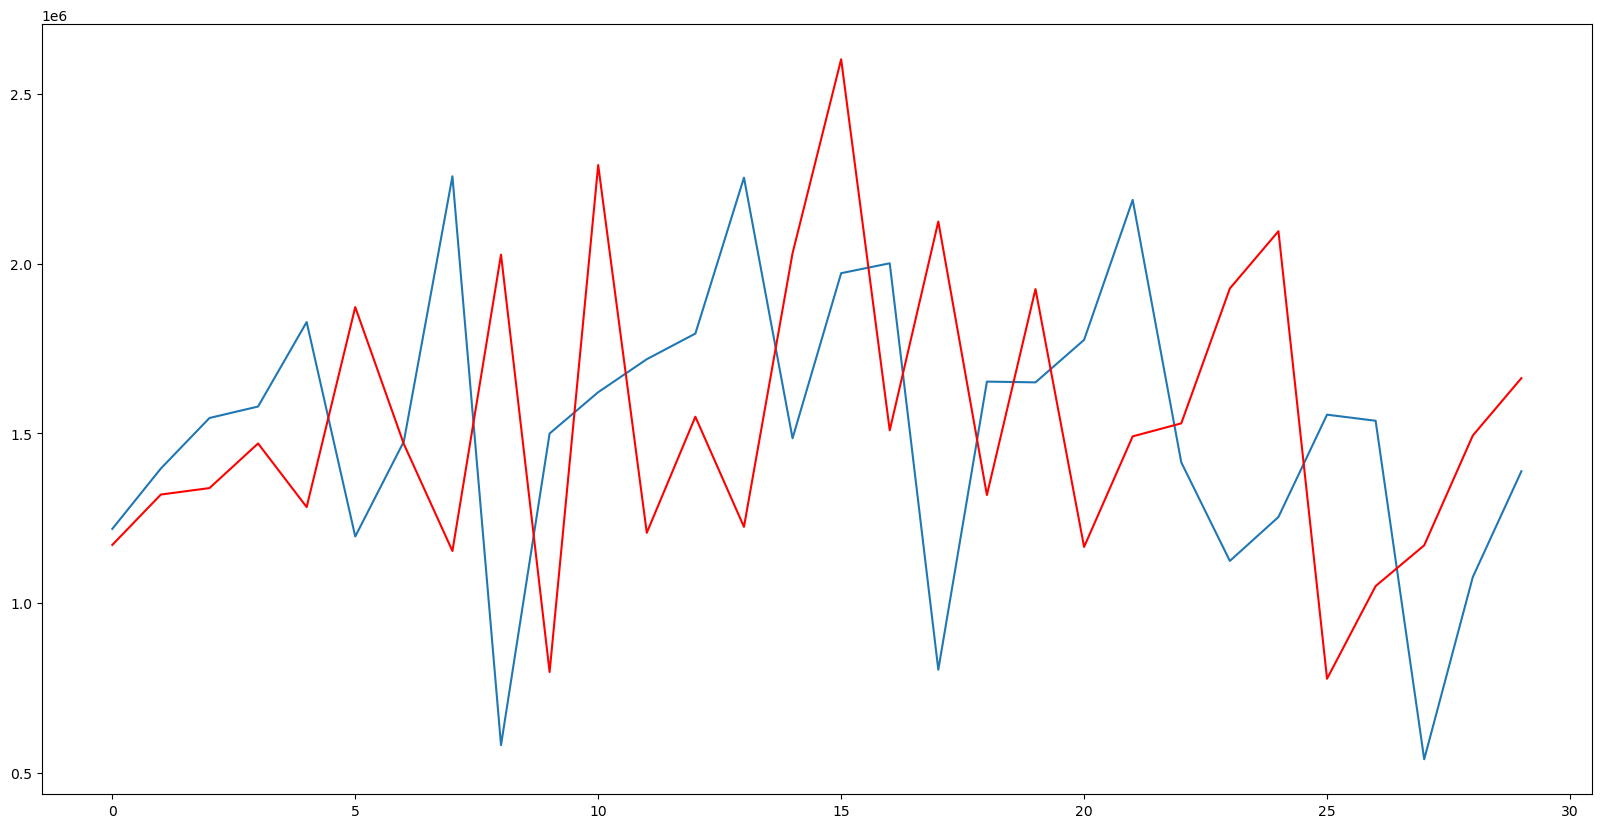

In [349]:
import matplotlib.pyplot as plt

x = range(len(data20_21_total_week.iloc[26:56]))
y = data20_21_total_week.iloc[26:56]

plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.plot(x,pred_weight[0:30],'r')

## 출하량

In [161]:
shipment_week = shipment.copy()
shipment_week = pd.concat([shipment_week,date_m],axis=1).set_index('Date').drop(['월','월별','월별증감율'],axis=1)

In [162]:
shipment_week = shipment_week.reset_index()
shipment_week['Date'] = pd.to_datetime(shipment_week['Date'])
shipment_week = shipment_week.set_index('Date')
shipment_week = date_all.join(shipment_week).fillna(method='ffill')
shipment_week

,내수계
Date,
2020-01-01,2704.00
2020-01-02,2704.00
2020-01-03,2704.00
2020-01-04,2704.00
2020-01-05,2704.00
...,...
2021-12-27,4710.00
2021-12-28,4710.00
2021-12-29,4710.00


In [163]:
def strftime(x):
    return x.strftime('%Y-%m')

In [164]:
shipment_week = shipment_week.reset_index()
shipment_week['month'] = shipment_week['Date'].apply(strftime)

In [165]:
li = []
for i in shipment_week['month'].unique():
    li.extend((shipment_week[shipment_week['month']==i].loc[:,'내수계']/len(shipment_week[shipment_week['month']==i])).values)

In [166]:
shipment_week['내수계'] = pd.Series(li)

In [167]:
shipment_week = shipment_week.set_index('Date').drop('month',axis=1).resample('w-tue').sum()

In [170]:
shipment_week.columns = ['출하량']

In [173]:
shipment_week

,출하량
Date,
2020-01-07,610.58
2020-01-14,610.58
2020-01-21,610.58
2020-01-28,610.58
2020-02-04,692.99
...,...
2021-12-07,1063.55
2021-12-14,1063.55
2021-12-21,1063.55


## 날씨

In [97]:
# 주 단위 날씨 데이터셋
weather_week = weather.copy()
weather_week['날짜'] = pd.to_datetime(weather_week['날짜'])
weather_week = weather_week.set_index('날짜')
weather_week = weather_week.resample('w-tue').mean()
weather_week

,평균온도,일강수량,상대습도,최심적설
날짜,,,,
2020-01-07,2.75,7.03,72.22,0.02
2020-01-14,1.85,0.73,65.51,0.02
2020-01-21,1.09,0.13,58.34,0.03
2020-01-28,5.32,3.92,75.36,0.00
2020-02-04,2.95,0.30,67.21,0.01
...,...,...,...,...
2021-12-07,3.70,0.23,64.27,0.00
2021-12-14,4.86,0.10,69.05,0.00
2021-12-21,3.08,0.51,66.75,0.19


## 착공면적

In [181]:
from sklearn.preprocessing import StandardScaler

In [69]:
construction_week = construction.copy()
construction_week = construction_week.set_index('Month')
construction_week = construction_week.reset_index()
construction_week['Month'] = pd.to_datetime(construction_week['Month'])
construction_week = construction_week.set_index('Month')
construction_week = date_all.join(construction_week).fillna(method='ffill')
construction_week

,연면적별
Date,
2020-01-01,6200509.00
2020-01-02,6200509.00
2020-01-03,6200509.00
2020-01-04,6200509.00
2020-01-05,6200509.00
...,...
2021-12-27,14132721.00
2021-12-28,14132721.00
2021-12-29,14132721.00


In [70]:
def strftime(x):
    return x.strftime('%Y-%m')

In [71]:
construction_week = construction_week.reset_index()
construction_week['month'] = construction_week['Date'].apply(strftime)

In [72]:
li = []
for i in construction_week['month'].unique():
    li.extend((construction_week[construction_week['month']==i].loc[:,'연면적별']/len(construction_week[construction_week['month']==i])).values)

In [73]:
construction_week['연면적별'] = pd.Series(li)

In [74]:
construction_week = construction_week.set_index('Date').drop('month',axis=1).resample('w-tue').sum()


In [75]:
construction_week

,연면적별
Date,
2020-01-07,1400114.94
2020-01-14,1400114.94
2020-01-21,1400114.94
2020-01-28,1400114.94
2020-02-04,1668158.64
...,...
2021-12-07,3191259.58
2021-12-14,3191259.58
2021-12-21,3191259.58


In [182]:
scaler_ = StandardScaler()
scaler_.fit(construction_week)
construction_week_scaled_ = scaler_.transform(construction_week)

construction_week_scaled_ = pd.DataFrame(construction_week_scaled_, columns=['착공지수'])

In [183]:
construction_week_scaled_.(50)

,착공지수
55,-1.75
56,-1.17
57,0.26
58,0.26
59,0.26
60,0.53
61,1.20
62,1.20
63,1.20
64,1.20


## 금리

In [106]:
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2022-01-04')
date_gold = pd.date_range(start, end, freq='w-tue').to_frame().rename(columns={0:'Date'}).reset_index(drop=True).set_index('Date')
date_gold

""
Date
2020-01-07
2020-01-14
2020-01-21
2020-01-28
2020-02-04
...
2021-12-07
2021-12-14
2021-12-21


In [107]:
import numpy as np

In [108]:
rate_week = rate.copy().set_index('index')
rate_week = rate_week.reset_index()
rate_week['index'] = pd.to_datetime(rate_week['index'])
rate_week = rate_week.set_index('index')
rate_week = date_all.join(rate_week)
rate_week = rate_week.resample('w-tue').sum()
rate_week = rate_week.replace(0,np.NaN).fillna(method='ffill')
rate_week 

,기준금리
Date,
2020-01-07,1.25
2020-01-14,1.25
2020-01-21,1.25
2020-01-28,1.25
2020-02-04,1.25
...,...
2021-12-07,1.00
2021-12-14,1.00
2021-12-21,1.00


## 데이터셋

In [183]:
# 13주~ 데이터 (93주)
dataset_total_13week = dataset_total_week.iloc[12:,:].set_index(dataset_total_week.index[:-12])
dataset_total_13week.columns = ['평균온도', '일강수량', '상대습도', '최심적설', '기준금리', '연면적별', '13수주량']
dataset_total_13week

,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,13수주량
날짜,,,,,,,
2020-01-07,10.30,2.20,65.20,0.00,0.75,2703566.42,1763550
2020-01-14,9.62,0.12,49.08,0.00,0.75,2445649.27,1926070
2020-01-21,9.47,1.05,56.94,0.00,0.75,2445649.27,1636000
2020-01-28,11.43,4.95,67.63,0.00,0.75,2445649.27,1984640
2020-02-04,10.85,0.06,50.09,0.00,0.75,2445649.27,1610600
...,...,...,...,...,...,...,...
2021-09-14,3.70,0.23,64.27,0.00,1.00,3191259.58,1625070
2021-09-21,4.86,0.10,69.05,0.00,1.00,3191259.58,861000
2021-09-28,3.08,0.51,66.75,0.19,1.00,3191259.58,1405540


In [237]:
data20_21_total_13week = data20_21_total_week.iloc[:-12,:].join(dataset_total_13week).set_index(np.arange(1,94))
data20_21_total_13week.to_csv('주차별합계.csv')
data20_21_total_13week

,수주량,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,13수주량
1,1158600,10.30,2.20,65.20,0.00,0.75,2703566.42,1763550
2,757000,9.62,0.12,49.08,0.00,0.75,2445649.27,1926070
3,1464000,9.47,1.05,56.94,0.00,0.75,2445649.27,1636000
4,1016800,11.43,4.95,67.63,0.00,0.75,2445649.27,1984640
5,1392050,10.85,0.06,50.09,0.00,0.75,2445649.27,1610600
...,...,...,...,...,...,...,...,...
89,1545000,3.70,0.23,64.27,0.00,1.00,3191259.58,1625070
90,1629800,4.86,0.10,69.05,0.00,1.00,3191259.58,861000
91,1556550,3.08,0.51,66.75,0.19,1.00,3191259.58,1405540
92,2220500,-1.19,0.48,59.43,0.58,1.00,3191259.58,1286540


In [109]:
# 2년 데이터셋 결합 (105주)
dataset_total_week = weather_week.join([rate_week,construction_week,data20_21_total_week])
dataset_total_week

,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,수주량
날짜,,,,,,,
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,1158600
2020-01-14,1.85,0.73,65.51,0.02,1.25,1400114.94,757000
2020-01-21,1.09,0.13,58.34,0.03,1.25,1400114.94,1464000
2020-01-28,5.32,3.92,75.36,0.00,1.25,1400114.94,1016800
2020-02-04,2.95,0.30,67.21,0.01,1.25,1668158.64,1392050
...,...,...,...,...,...,...,...
2021-12-07,3.70,0.23,64.27,0.00,1.00,3191259.58,1625070
2021-12-14,4.86,0.10,69.05,0.00,1.00,3191259.58,861000
2021-12-21,3.08,0.51,66.75,0.19,1.00,3191259.58,1405540


In [110]:
# (거래처별, 제품별) 데이터셋 결합
dataset_detail_week = weather_week.join([rate_week,construction_week,data20_21_detail_week])

In [566]:
dataset_detail_week.to_csv('dataset_detail_week.csv')

In [4]:
dataset_detail_week= pd.read_csv('dataset_detail_week.csv', index_col=0)
dataset_detail_week

,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,거래처코드,제품명,수주량
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-PR1000,20000.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-HR1000,15000.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-SR2000,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-HR1500,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-SR2000A,0.00
...,...,...,...,...,...,...,...,...,...
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,PEMA-PCR3000N,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,PEMA-SR3000F,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,AE,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,PEMA-580FX,15000.00


In [8]:
dataset_detail_week = dataset_detail_week[dataset_detail_week['수주량']!=0]

In [ ]:
pd.concat([dataset_detail_week,pd.get_dummies(dataset_detail_week.제품명)])

In [7]:
pd.get_dummies(dataset_detail_week.제품명)

,AE,ARE-580FX,CSA4000,CSA5000,PEMA-500FR,PEMA-580FX,PEMA-CR1000,PEMA-CSA5000,PEMA-HR1000,PEMA-HR1000S,...,PEMA-SN400,PEMA-SP1000,PEMA-SPR,PEMA-SR2000,PEMA-SR2000A,PEMA-SR3000F,PEMA-SR5000F,PR1000,SRE-110,SRE-200
2020-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-07,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2020-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2022-01-04,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-04,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 미래 변수 시계열 예측 (3개월)
 - 날씨 (온도, 습도, 강우량, 적설량)
 - 착공면적
 - 금리

In [5]:
data20_21_total_13week = pd.read_csv('주차별합계.csv', index_col=0)
data20_21_total_13week.head(2)

,수주량,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,13수주량
1,1158600,10.30,2.20,65.20,0.00,0.75,2703566.42,1763550
2,757000,9.62,0.12,49.08,0.00,0.75,2445649.27,1926070


### 온도

In [62]:
# 온도
a = data20_21_total_13week.drop(['수주량','일강수량','상대습도','최심적설','기준금리','연면적별','13수주량'],axis=1)
a

,평균온도
1,10.30
2,9.62
3,9.47
4,11.43
5,10.85
...,...
89,3.70
90,4.86
91,3.08
92,-1.19


In [27]:
train = a.iloc[:len(a)-29]
test = a.iloc[len(a)-29:]

In [38]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=61.745, Time=0.18 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=63.745, Time=1.59 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=65.745, Time=2.56 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=67.745, Time=7.84 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=63.745, Time=1.41 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=65.745, Time=1.99 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=67.745, Time=5.46 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=69.745, Time=9.01 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=65.745, Time=4.32 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=67.745, Time=6.09 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=69.745, Time=6.80 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=71.745, Time=11.41 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=67.745, Time=8.61 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=69.745, Time=11.37 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=71.745, Time=13.72 sec
 ARIMA(0,1,1)(0,1,0)[5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   64
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 52)   Log Likelihood                 -27.063
Date:                             Wed, 23 Nov 2022   AIC                             58.125
Time:                                     14:57:28   BIC                             58.921
Sample:                                          0   HQIC                            57.624
                                              - 64                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7346      0.498     -1.474      0.141      -1.712       0.242
sigma2         7.4794      4.015      1.863      0.063      -0.390      15.349
===================================================================================
Ljung-Box (L1) (Q):                   1.41   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.24   Prob(JB):                         0.73
Heteroskedasticity (H):               0.57   Skew:                            -0.56
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings;warnings.filterwarnings('ignore')

model = SARIMAX(train['평균온도'],
               order = (0,1,1),
               seasonal_order=(0,1,0,52))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                평균온도   No. Observations:                   64
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 52)   Log Likelihood                 -27.063
Date:                             Wed, 23 Nov 2022   AIC                             58.125
Time:                                     14:58:25   BIC                             58.921
Sample:                                          0   HQIC                            57.624
                                              - 64                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7346      0.498     -1.474      0.141      -1.712       0.242
sigma2         7.4794      4.015      1.863      0.063      -0.390      15.349
===================================================================================
Ljung-Box (L1) (Q):                   1.41   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.24   Prob(JB):                         0.73
Heteroskedasticity (H):               0.57   Skew:                            -0.56
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

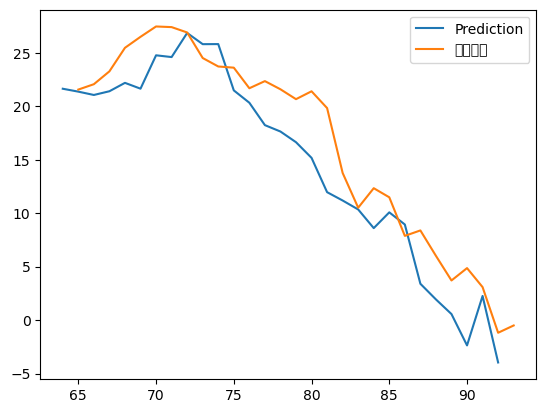

In [40]:
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start,end,typ='levels').rename('Prediction')

predictions.plot(legend=True)
test['평균온도'].plot(legend=True)

In [41]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
print('rmse:', rmse(test.평균온도,predictions))
print('mse:', mean_squared_error(test.평균온도,predictions))

rmse: 3.070103753199957
mse: 9.425537055412464


<AxesSubplot:>

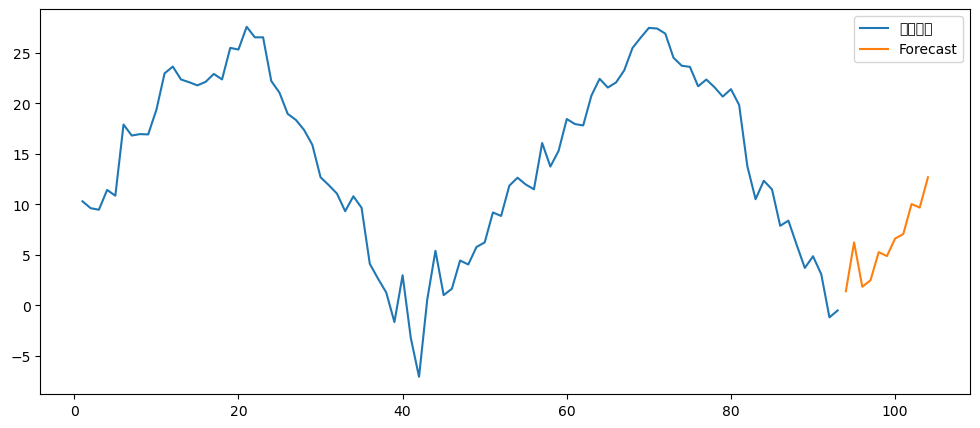

In [60]:
# 3개월(12주) 예측

model_temp = SARIMAX(a.평균온도, order=(0,1,1), seasonal_order=(0,1,0,52))
result = model_temp.fit()
weather_week_future_temp = result.predict(start=len(a)+1,end=(len(a)-1)+12,
                         typ = 'level').rename('Forecast')
a.평균온도.plot(figsize=(12,5),legend=True)
weather_week_future_temp.plot(legend=True)

In [61]:
weather_week_future_temp

94     1.40
95     6.24
96     1.84
97     2.48
98     5.27
99     4.88
100    6.61
101    7.06
102   10.03
103    9.68
104   12.68
Name: Forecast, dtype: float64

In [94]:
weather_week_future_temp.to_csv('미래변수_온도.csv')

### 강수량

In [63]:
# 강수량
b = data20_21_total_13week.drop(['수주량','평균온도','상대습도','최심적설','기준금리','연면적별','13수주량'],axis=1)
train = b.iloc[:len(b)-29]
test = b.iloc[len(b)-29:]
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=67.359, Time=0.18 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=69.359, Time=1.81 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=71.359, Time=3.60 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=73.359, Time=8.41 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=69.359, Time=1.47 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=71.359, Time=1.90 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=73.359, Time=4.63 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=75.359, Time=10.19 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=71.359, Time=3.71 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=73.359, Time=5.81 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=75.359, Time=6.58 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=77.359, Time=12.26 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=73.359, Time=8.47 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=75.359, Time=11.58 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=77.359, Time=13.68 sec
 ARIMA(0,1,1)(0,1,0)[

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   64
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 52)   Log Likelihood                 -30.222
Date:                            Wed, 23 Nov 2022   AIC                             66.445
Time:                                    15:48:06   BIC                             67.638
Sample:                                         0   HQIC                            65.692
                                             - 64                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5662      0.406     -1.396      0.163      -1.361       0.229
ar.L2         -0.5360      0.321     -1.669      0.095      -1.166       0.094
sigma2        13.2266      7.230      1.829      0.067      -0.943      27.397
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.74   Prob(JB):                         0.77
Heteroskedasticity (H):               0.78   Skew:                            -0.40
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

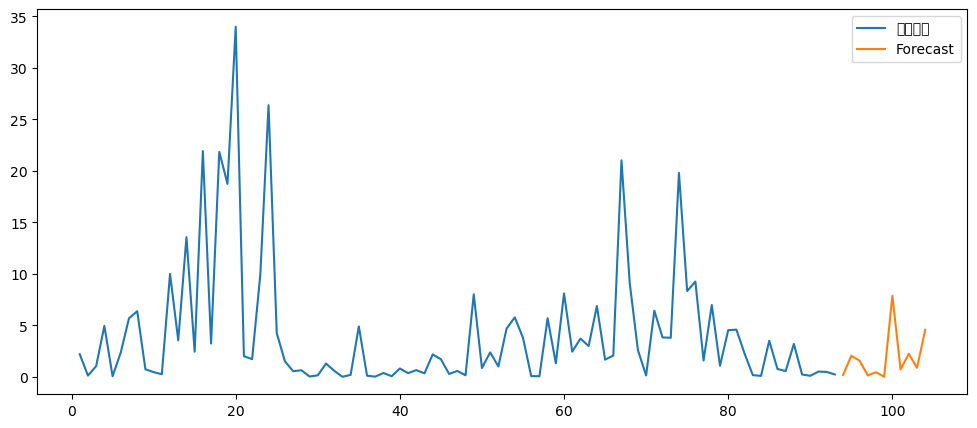

In [72]:
# 3개월(12주) 예측

model_rain = SARIMAX(b.일강수량, order=(2,1,0), seasonal_order=(0,1,0,52))
result = model_rain.fit()
weather_week_future_rain = result.predict(start=len(b)+1,end=(len(b)-1)+12,
                         typ = 'level').rename('Forecast')
b.일강수량.plot(figsize=(12,5),legend=True)
weather_week_future_rain.plot(legend=True)

In [95]:
weather_week_future_rain.to_csv('미래변수_강수량.csv')

### 습도

In [73]:
# 습도
c = data20_21_total_13week.drop(['수주량','평균온도','일강수량','최심적설','기준금리','연면적별','13수주량'],axis=1)
train = c.iloc[:len(b)-29]
test = c.iloc[len(b)-29:]
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=86.848, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=88.848, Time=2.22 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=90.847, Time=17.57 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=92.848, Time=10.55 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=88.848, Time=1.93 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=90.848, Time=3.08 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=92.848, Time=16.05 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=94.848, Time=10.86 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=90.848, Time=7.34 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=92.848, Time=11.00 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=94.848, Time=20.79 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=96.848, Time=14.44 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=92.848, Time=19.07 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=94.848, Time=21.51 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=inf, Time=132.85 sec
 ARIMA(0,1,1)(0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   64
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 52)   Log Likelihood                 -37.681
Date:                            Wed, 23 Nov 2022   AIC                             81.362
Time:                                    16:47:00   BIC                             82.555
Sample:                                         0   HQIC                            80.609
                                             - 64                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8811      0.401     -2.197      0.028      -1.667      -0.095
ar.L2         -0.6503      0.267     -2.432      0.015      -1.174      -0.126
sigma2        48.5630     22.787      2.131      0.033       3.901      93.225
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.56   Prob(JB):                         0.93
Heteroskedasticity (H):               0.46   Skew:                            -0.28
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

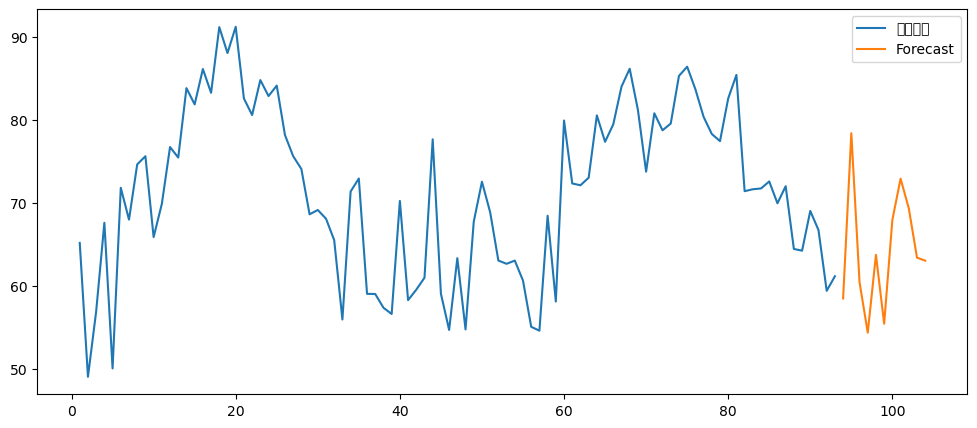

In [74]:
# 3개월(12주) 예측

model_humidity = SARIMAX(c.상대습도, order=(2,1,0), seasonal_order=(0,1,0,52))
result = model_humidity.fit()
weather_week_future_humidity = result.predict(start=len(c)+1,end=(len(c)-1)+12,
                         typ = 'level').rename('Forecast')
c.상대습도.plot(figsize=(12,5),legend=True)
weather_week_future_humidity.plot(legend=True)

In [96]:
weather_week_future_humidity.to_csv('미래변수_습도.csv')

### 적설량

In [81]:
# 적설량
d = data20_21_total_13week.drop(['수주량','평균온도','일강수량','상대습도','기준금리','연면적별','13수주량'],axis=1)
train = d.iloc[:len(d)-29]
test = d.iloc[len(d)-29:]
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52] intercept   : AIC=-220.799, Time=1.10 sec
Total fit time: 1.103 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   64
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                 112.399
Date:                            Wed, 23 Nov 2022   AIC                           -220.799
Time:                                    16:51:02   BIC                           -220.003
Sample:                                         0   HQIC                          -221.301
                                             - 64                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.402e-06   4.89e-06     -1.105      0.269    -1.5e-05    4.18e-06
sigma2      3.261e-10   7.48e-10      0.436      0.663   -1.14e-09    1.79e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.08
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                             2.56
Prob(H) (two-sided):                  0.18   Kurtosis:                         8.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

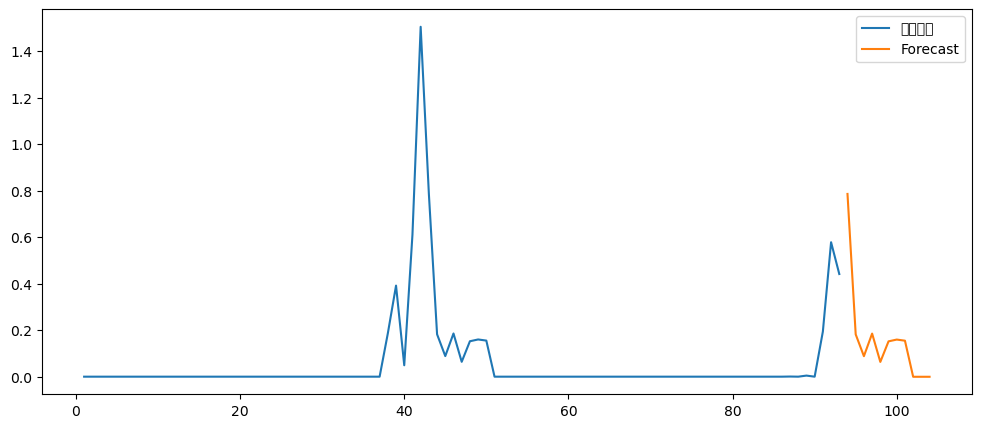

In [79]:
# 3개월(12주) 예측

model_snow = SARIMAX(d.최심적설, order=(0,1,1), seasonal_order=(0,1,0,52))
result = model_snow.fit()
weather_week_future_snow = result.predict(start=len(d)+1,end=(len(d)-1)+12,
                         typ = 'level').rename('Forecast')
d.최심적설.plot(figsize=(12,5),legend=True)
weather_week_future_snow.plot(legend=True)

### 금리

In [82]:
# 금리
e = data20_21_total_13week.drop(['수주량','평균온도','일강수량','상대습도','최심적설','연면적별','13수주량'],axis=1)
train = e.iloc[:len(b)-29]
test = e.iloc[len(b)-29:]
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=-23.659, Time=0.26 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=-21.659, Time=1.78 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=-19.659, Time=3.34 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=-17.659, Time=10.93 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=-21.659, Time=2.46 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=-19.659, Time=2.31 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=-17.659, Time=8.22 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=-15.659, Time=17.34 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=-19.659, Time=7.24 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=-17.659, Time=6.46 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=-15.659, Time=9.52 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=-13.659, Time=34.36 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=-17.659, Time=20.95 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=-15.659, Time=15.11 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=-13.659, Time=19.64 sec
 ARI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   64
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                  12.829
Date:                            Wed, 23 Nov 2022   AIC                            -23.659
Time:                                    17:20:38   BIC                            -23.261
Sample:                                         0   HQIC                           -23.909
                                             - 64                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0057      0.001      5.245      0.000       0.004       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                31.90
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             2.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

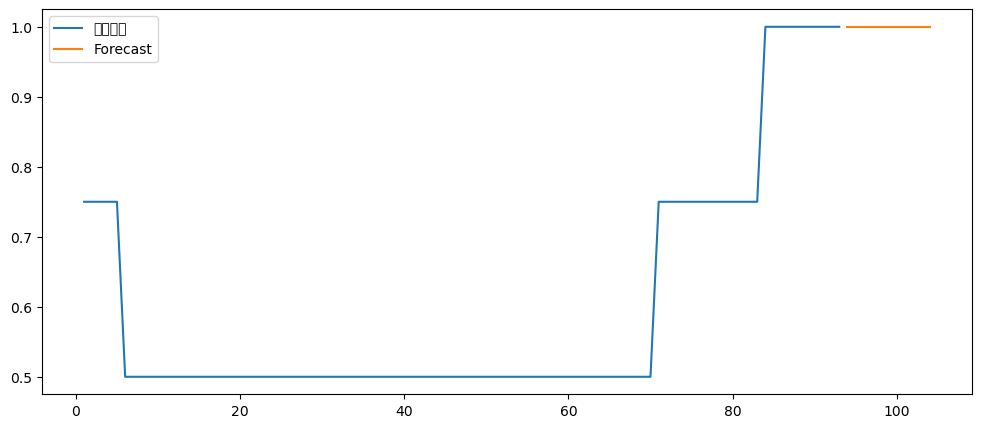

In [89]:
# 3개월(12주) 예측

model_rate = SARIMAX(e.기준금리, order=(0,1,0), seasonal_order=(0,1,0,52))
result = model_rate.fit()
weather_week_future_rate = result.predict(start=len(e)+1,end=(len(e)-1)+12,
                         typ = 'level').rename('Forecast')
e.기준금리.plot(figsize=(12,5),legend=True)
weather_week_future_rate.plot(legend=True)

### 착공면적

In [90]:
# 착공면적
f = data20_21_total_13week.drop(['수주량','평균온도','일강수량','상대습도','최심적설','기준금리','13수주량'],axis=1)
train = f.iloc[:len(b)-29]
test = f.iloc[len(b)-29:]
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=281.066, Time=0.14 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=276.157, Time=1.89 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=inf, Time=6.05 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=inf, Time=17.45 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=276.159, Time=1.48 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=278.158, Time=2.45 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=inf, Time=13.46 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=inf, Time=22.97 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=278.159, Time=4.81 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=280.148, Time=20.32 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=282.148, Time=21.16 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=284.148, Time=31.11 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=280.159, Time=9.75 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=282.148, Time=37.33 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=284.148, Time=37.66 sec
 ARIMA(0,1,1)(0,1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   64
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 52)   Log Likelihood                -131.835
Date:                              Wed, 23 Nov 2022   AIC                            271.671
Time:                                      18:19:17   BIC                            273.262
Sample:                                           0   HQIC                           270.667
                                               - 64                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0655      1.178     -0.056      0.956      -2.375       2.244
ar.S.L52       0.9999      0.460      2.172      0.030       0.097       1.902
ma.S.L52    7.201e-05      0.813   8.86e-05      1.000      -1.594       1.594
sigma2      2.904e+09   9.36e-11    3.1e+19      0.000     2.9e+09     2.9e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                22.96
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):             566.40   Skew:                            -2.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.33e+36. Standard errors may be unstable.
"""

<AxesSubplot:>

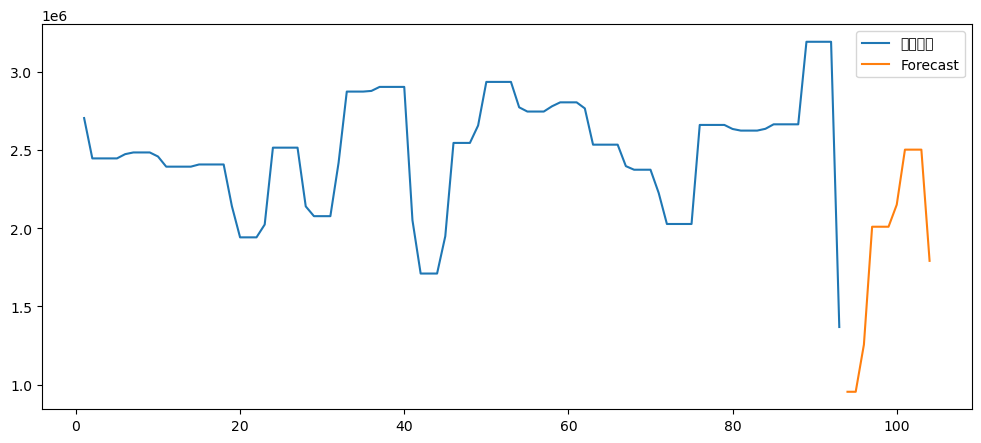

In [93]:
# 3개월(12주) 예측

model_area = SARIMAX(f.연면적별, order=(1,1,0), seasonal_order=(1,1,1,52))
result = model_area.fit()
weather_week_future_area = result.predict(start=len(f)+1,end=(len(f)-1)+12,
                         typ = 'level').rename('Forecast')
f.연면적별.plot(figsize=(12,5),legend=True)
weather_week_future_area.plot(legend=True)

## 학습 및 평가

In [195]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [231]:
# 모델 생성
# lr_clf = LogisticRegression()
lr_clf = LinearRegression()

# 피쳐, 타겟 지정
x_feature = data20_21_total_13week.drop(['13수주량'],axis=1)
y_label = data20_21_total_13week['13수주량'].values

x_train,x_test,y_train,y_test = train_test_split(x_feature,y_label,test_size=0.2, random_state=10)

lr_clf.fit(x_train,y_train)
pred=lr_clf.predict(x_test)

mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)

print(np.sqrt(mse))
print(mae)

343723.86987805803
280960.8813258178


In [232]:
score = cross_val_score(lr_clf,x_feature,y_label,scoring='neg_mean_squared_error',cv=5)

In [233]:
pd.DataFrame(np.sqrt(score*-1))

,0
0,276852.17
1,471434.79
2,295823.18
3,377440.55
4,454610.93


In [234]:
np.sqrt(score.mean()*-1)

383547.05442956934

In [193]:
pred

array([1560218.27158887, 1292851.91092199, 1562323.58967828,
       1671338.00739937, 1535973.18133444, 1560125.8512829 ,
       1556331.25008084,  649169.96145891, 1627734.77544028,
       1528929.659034  , 1513131.77710525, 1443988.93623717,
       1742475.14050653, 1443535.41456812, 1604357.19447898,
       1532157.5899309 , 1426355.70727612, 1782732.4032126 ,
       1504713.31981331])

In [194]:
y_test

array([1775000, 1405540, 1984640, 2187550, 1195570, 1011000, 1397540,
        539000,  973000, 1420070, 1554540, 2220500, 1926070, 1222000,
       1870050, 1218000, 1547800, 2000700, 1436600], dtype=int64)

In [235]:
def correlation(X, y):
    res = [np.abs(np.corrcoef(X[:,i], y)[1,0]) for i in range(5)]
    return res
 
def LRC(X, y):
    std = np.std(X, axis=0)
    std_X = X/std
    
    reg = LinearRegression().fit(X, y)
    coef_sum = np.sum(np.abs(reg.coef_))
    res = np.abs(reg.coef_)/coef_sum
    return res
 
def plot_importance(X, y, importance):
    temp1 = X.columns
    temp2 = importance(X, y)
    result = sorted(zip(temp1, temp2), key=lambda x:x[1])
    label = [x[0] for x in result]
    value = [x[1] for x in result]
    fig = plt.figure(figsize=(6,7))
    fig.set_facecolor('white')
    plt.barh(label, value, height=0.5)
    plt.show()

In [236]:
plot_importance(x_feature,y_label,LRC(x_feature,y_label))

TypeError: 'numpy.ndarray' object is not callable

# 월 단위 데이터셋 생성 (사용하지 않음)

## 수주량

In [478]:
# 월 단위 수주량 합계 데이터셋
data20_21_total_month = data20_21.copy()
data20_21_total_month = data20_21_total_month.pivot_table('수주량',index=['수주월'], aggfunc='sum')
data20_21_total_month

,수주량
수주월,
2020-01,4808400
2020-02,6317320
2020-03,7712350
2020-04,7157310
2020-05,7712350
2020-06,5784210
2020-07,6645350
2020-08,6182310
2020-09,7566350


In [479]:
# 월 단위 (거래처별, 품목별) 수주량  합계 데이터셋
data20_21_detail_month = data20_21.copy()
data20_21_detail_month = data20_21_detail_month.pivot_table('수주량',index=['수주월','거래처코드','제품명'], aggfunc='sum')
data20_21_detail_month = data20_21_detail_month.reset_index()
data20_21_detail_month = data20_21_detail_month.set_index('수주월')
data20_21_detail_month

,거래처코드,제품명,수주량
수주월,,,
2020-01,2001102,AE,3000
2020-01,2001102,CSA5000,23000
2020-01,2001102,PEMA-HR1000,7000
2020-01,2001102,PEMA-HR1500,4000
2020-01,2001102,PEMA-PR1000,20000
...,...,...,...
2021-12,2007800,PEMA-HR1000,10000
2021-12,2007800,PEMA-HR1500,30000
2021-12,2007800,PEMA-PCM2000,5000


## 날씨

In [480]:
# 월 단위 날씨
weather_month = weather.copy()
weather_month['년월'] = weather_month['날짜'].apply(yearmonth)
# weather['날짜'] = pd.to_datetime(weather['날짜'])

weather_month = weather_month.pivot_table(['평균온도','일강수량','상대습도','최심적설'],index='년월',aggfunc='mean')
weather_month.head(3)

,상대습도,일강수량,최심적설,평균온도
년월,,,,
2020-01,68,3,0,3
2020-02,67,2,0,4
2020-03,61,1,0,8


## 착공면적

In [481]:
construction_month = construction.copy()
construction_month = construction_month.set_index('Month')
construction_month.head(3)

,연면적별
Month,
2020-01,6200509
2020-02,7743793
2020-03,11972937


## 금리

In [482]:
rate_month = rate.copy().set_index('index')
rate_month.head(3)

,기준금리
index,
2020-01,1
2020-02,1
2020-03,1


## 데이터셋

In [483]:
dataset_total_month = weather_month.join([rate_month,construction_month,data20_21_total_month])
dataset_total_month

,상대습도,일강수량,최심적설,평균온도,기준금리,연면적별,수주량
년월,,,,,,,
2020-01,68,3,0,3,1,6200509,4808400
2020-02,67,2,0,4,1,7743793,6317320
2020-03,61,1,0,8,1,11972937,7712350
2020-04,56,1,0,11,1,10481354,7157310
2020-05,73,4,0,18,0,10999316,7712350
2020-06,76,6,0,23,0,10255271,5784210
2020-07,86,13,0,22,0,10658885,6645350
2020-08,85,13,0,27,0,8595586,6182310
2020-09,80,8,0,20,0,10775873,7566350


## 상세 데이터셋

In [484]:
dataset_detail_month = weather_month.join([rate_month,construction_month,data20_21_detail_month])
dataset_detail_month

,상대습도,일강수량,최심적설,평균온도,기준금리,연면적별,거래처코드,제품명,수주량
2020-01,68,3,0,3,1,6200509,2001102,AE,3000
2020-01,68,3,0,3,1,6200509,2001102,CSA5000,23000
2020-01,68,3,0,3,1,6200509,2001102,PEMA-HR1000,7000
2020-01,68,3,0,3,1,6200509,2001102,PEMA-HR1500,4000
2020-01,68,3,0,3,1,6200509,2001102,PEMA-PR1000,20000
...,...,...,...,...,...,...,...,...,...
2021-12,65,0,0,2,1,14132721,2007800,PEMA-HR1000,10000
2021-12,65,0,0,2,1,14132721,2007800,PEMA-HR1500,30000
2021-12,65,0,0,2,1,14132721,2007800,PEMA-PCM2000,5000
2021-12,65,0,0,2,1,14132721,2007800,PEMA-SR2000,36000


In [485]:
dataset_detail_month[(dataset_detail_month['거래처코드']==2001102)&(dataset_detail_month['제품명']=='AE')]

,상대습도,일강수량,최심적설,평균온도,기준금리,연면적별,거래처코드,제품명,수주량
2020-01,68,3,0,3,1,6200509,2001102,AE,3000
2020-03,61,1,0,8,1,11972937,2001102,AE,3000
2020-05,73,4,0,18,0,10999316,2001102,AE,3000
2020-07,86,13,0,22,0,10658885,2001102,AE,3000
2020-09,80,8,0,20,0,10775873,2001102,AE,3000
2020-11,66,1,0,9,0,12312253,2001102,AE,3000
2021-01,64,1,1,-1,0,7570978,2001102,AE,3000
2021-03,68,4,0,9,0,12996528,2001102,AE,3000
2021-05,71,4,0,17,0,12417941,2001102,AE,3000
2021-07,81,8,0,26,0,10510350,2001102,AE,3000


In [486]:
for i in dataset_detail['거래처코드'].unique():
    for j in dataset_detail[dataset_detail['거래처코드']==i]['제품명'].unique():
        data = dataset_detail[(dataset_detail['거래처코드']==i)&(dataset_detail['제품명']==j)]

KeyError: '거래처코드'

In [ ]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=5, max_q=3,m=12,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()